Movies Dataset - Data Analysis

Data Import and First Inspection

In [244]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.options.display.max_columns = 30
pd.options.display.float_format = '{:.2f}'.format

In [245]:
df = pd.read_csv("movies_complete.csv", parse_dates=["release_date"])

In [246]:
df

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
0,862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.00,373.55,Pixar Animation Studios,United States of America,5415.00,7.70,21.95,81.00,"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circum...",English,<img src='http://image.tmdb.org/t/p/w185//uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg' style='height:100px;'>,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wallace Shawn|John Ratzenberger|Annie Potts|John Morris|Erik von Detten|Laurie Metcalf|R. Lee Ermey|Sarah Freeman|Penn Jillette,13,106,John Lasseter
1,8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,65.00,262.80,TriStar Pictures|Teitler Film|Interscope Communications,United States of America,2413.00,6.90,17.02,104.00,"When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- in...",English|Français,<img src='http://image.tmdb.org/t/p/w185//vgpXmVaVyUL7GGiDeiK1mKEKzcX.jpg' style='height:100px;'>,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bradley Pierce|Bonnie Hunt|Bebe Neuwirth|David Alan Grier|Patricia Clarkson|Adam Hann-Byrd|Laura Bell Bundy|James Handy|Gillian Barber|Brandon Obray|Cyru...,26,16,Joe Johnston
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for Love.,1995-12-22,Romance|Comedy,Grumpy Old Men Collection,en,NaN,NaN,Warner Bros.|Lancaster Gate,United States of America,92.00,6.50,11.71,101.00,"A family wedding reignites the ancient feud between next-door neighbors and fishing buddies John and Max. Meanwhile, a sultry Italian divorcée opens a restaurant at the local bait shop, alarming t...",English,<img src='http://image.tmdb.org/t/p/w185//1FSXpj5e8l4KH6nVFO5SPUeraOt.jpg' style='height:100px;'>,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia Loren|Daryl Hannah|Burgess Meredith|Kevin Pollak,7,4,Howard Deutch
3,31357,Waiting to Exhale,Friends are the people who let you be yourself... and never let you forget it.,1995-12-22,Comedy|Drama|Romance,NaN,en,16.00,81.45,Twentieth Century Fox Film Corporation,United States of America,34.00,6.10,3.86,127.00,"Cheated on, mistreated and stepped on, the women are holding their breath, waiting for the elusive ""good man"" to break a string of less-than-stellar lovers. Friends and confidants Vannah, Bernie, ...",English,<img src='http://image.tmdb.org/t/p/w185//4wjGMwPsdlvi025ZqR4rXnFDvBz.jpg' style='height:100px;'>,Whitney Houston|Angela Bassett|Loretta Devine|Lela Rochon|Gregory Hines|Dennis Haysbert|Michael Beach|Mykelti Williamson|Lamont Johnson|Wesley Snipes,10,10,Forest Whitaker
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's In For The Surprise Of His Life!,1995-02-10,Comedy,Father of the Bride Collection,en,NaN,76.58,Sandollar Productions|Touchstone Pictures,United States of America,173.00,5.70,8.39,106.00,"Just when George Banks has recovered from his daughter's wedding, he receives the news that she's pregnant ... and that George's wife, Nina, is expecting too. He was planning on selling their home...",English,<img src='http://image.tmdb.org/t/p/w185//lf9RTErt8BSLQy98aSFblElvsCQ.jpg' style='height:100px;'>,Steve Martin|Diane Keaton|Martin Short|Kimberly Williams-Paisley|George Newbern|Kieran Culkin|BD Wong|Peter Michael Goetz|Kate McGregor-Stewart|Jane Adams|Eugene Levy|Lori Alan,12,7,Charles Shyer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44686,439050,Subdue,Rising and falling between a man and woman,NaT,Drama|Family,NaN,fa,NaN

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     44691 non-null  int64         
 1   title                  44691 non-null  object        
 2   tagline                20284 non-null  object        
 3   release_date           44657 non-null  datetime64[ns]
 4   genres                 42586 non-null  object        
 5   belongs_to_collection  4463 non-null   object        
 6   original_language      44681 non-null  object        
 7   budget_musd            8854 non-null   float64       
 8   revenue_musd           7385 non-null   float64       
 9   production_companies   33356 non-null  object        
 10  production_countries   38835 non-null  object        
 11  vote_count             44691 non-null  float64       
 12  vote_average           42077 non-null  float64       
 13  p

In [248]:
df.genres[1]

'Adventure|Fantasy|Family'

In [249]:
df.cast[1]

'Robin Williams|Jonathan Hyde|Kirsten Dunst|Bradley Pierce|Bonnie Hunt|Bebe Neuwirth|David Alan Grier|Patricia Clarkson|Adam Hann-Byrd|Laura Bell Bundy|James Handy|Gillian Barber|Brandon Obray|Cyrus Thiedeke|Gary Joseph Thorup|Leonard Zola|Lloyd Berry|Malcolm Stewart|Annabel Kershaw|Darryl Henriques|Robyn Driscoll|Peter Bryant|Sarah Gilson|Florica Vlad|June Lion|Brenda Lockmuller'

In [250]:
df.describe()

,id,release_date,budget_musd,revenue_musd,vote_count,vote_average,popularity,runtime,cast_size,crew_size
count,44691.00,44657,8854.00,7385.00,44691.00,42077.00,44691.00,43179.00,44691.00,44691.00
mean,107186.24,1992-04-28 16:30:02.539355520,21.67,68.97,111.65,6.00,2.96,97.57,12.48,10.31
min,2.00,1874-12-09 00:00:00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
25%,26033.50,1978-08-12 00:00:00,2.00,2.41,3.00,5.30,0.40,86.00,6.00,2.00
50%,59110.00,2001-08-16 00:00:00,8.20,16.87,10.00,6.10,1.15,95.00,10.00,6.00
75%,154251.00,2010-12-10 00:00:00,25.00,67.64,35.00,6.80,3.77,107.00,15.00,12.00
max,469172.00,2017-12-27 00:00:00,380.00,2787.97,14075.00,10.00,547.49,1256.00,313.00,435.00
std,111806.36,NaN,34.36,146.61,495.32,1.28,6.04,34.65,12.12,15.89


In [251]:
df.budget_musd.value_counts()

budget_musd
5.00      286
10.00     258
20.00     243
2.00      241
15.00     226
         ... 
82.50       1
270.00      1
0.00        1
72.50       1
1.25        1
Name: count, Length: 1218, dtype: int64

In [252]:
df.budget_musd.value_counts(dropna=False).head(20)

budget_musd
NaN      35837
5.00       286
10.00      258
20.00      243
2.00       241
15.00      226
3.00       220
25.00      206
1.00       195
30.00      189
4.00       180
6.00       173
12.00      171
40.00      166
8.00       155
35.00      141
0.50       141
7.00       137
50.00      124
1.50       119
Name: count, dtype: int64

In [253]:
df.revenue_musd.value_counts(dropna=False).head(20)

revenue_musd
NaN      37306
12.00       20
10.00       19
11.00       19
2.00        18
6.00        17
5.00        14
0.50        13
8.00        13
0.00        12
14.00       12
7.00        11
3.00        10
1.00        10
20.00       10
0.00         9
1.50         9
4.00         9
30.00        8
4.10         8
Name: count, dtype: int64

In [254]:
df.vote_average.value_counts(dropna=False)

vote_average
NaN     2614
6.00    2421
5.00    1969
7.00    1859
6.50    1705
        ... 
9.40       3
9.60       1
9.80       1
0.70       1
1.10       1
Name: count, Length: 93, dtype: int64

In [255]:
df.vote_count.value_counts()

vote_count
1.00       3186
2.00       3056
3.00       2729
0.00       2614
4.00       2442
           ... 
2755.00       1
1187.00       1
4200.00       1
3322.00       1
2712.00       1
Name: count, Length: 1820, dtype: int64

In [256]:
df[df.title == "Cinderella"].count()

id                       11
title                    11
tagline                   3
release_date             11
genres                   10
belongs_to_collection     1
original_language        11
budget_musd               2
revenue_musd              2
production_companies      8
production_countries     10
vote_count               11
vote_average             11
popularity               11
runtime                  11
overview                 11
spoken_languages         11
poster_path              11
cast                     11
cast_size                11
crew_size                11
director                 11
dtype: int64

The Best and the Worst Movie .. Part 1 

In [257]:
from IPython.display import HTML

pd.options.display.max_colwidth = 200

In [258]:
df_best = df[["poster_path", "title", "budget_musd", "revenue_musd", "vote_count", "vote_average", "popularity" ]].copy()
df_best

,poster_path,title,budget_musd,revenue_musd,vote_count,vote_average,popularity
0,<img src='http://image.tmdb.org/t/p/w185//uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg' style='height:100px;'>,Toy Story,30.00,373.55,5415.00,7.70,21.95
1,<img src='http://image.tmdb.org/t/p/w185//vgpXmVaVyUL7GGiDeiK1mKEKzcX.jpg' style='height:100px;'>,Jumanji,65.00,262.80,2413.00,6.90,17.02
2,<img src='http://image.tmdb.org/t/p/w185//1FSXpj5e8l4KH6nVFO5SPUeraOt.jpg' style='height:100px;'>,Grumpier Old Men,NaN,NaN,92.00,6.50,11.71
3,<img src='http://image.tmdb.org/t/p/w185//4wjGMwPsdlvi025ZqR4rXnFDvBz.jpg' style='height:100px;'>,Waiting to Exhale,16.00,81.45,34.00,6.10,3.86
4,<img src='http://image.tmdb.org/t/p/w185//lf9RTErt8BSLQy98aSFblElvsCQ.jpg' style='height:100px;'>,Father of the Bride Part II,NaN,76.58,173.00,5.70,8.39
...,...,...,...,...,...,...,...
44686,<img src='http://image.tmdb.org/t/p/w185//pfC8gZ1BQANxxdadIMpdywbPG9X.jpg' style='height:100px;'>,Subdue,NaN,NaN,1.00,4.00,0.07
44687,<img src='http://image.tmdb.org/t/p/w185//xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg' style='height:100px;'>,Century of Birthing,NaN,NaN,3.00,9.00,0.18
44688,<img src='http://image.tmdb.org/t/p/w185//eGgakGLQQzUwrCfTxcGu3mXPf8g.jpg' style='height:100px;'>,Betrayal,NaN,NaN,6.00,3.80,0.90
44689,<img src='http://image.tmdb.org/t/p/w185//aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg' style='height:100px;'>,Satan Triumphant,NaN,NaN,0.00,NaN,0.00


In [259]:
df_best["profit_musd"] = df.revenue_musd.sub(df.budget_musd)
df_best["return"] = df.revenue_musd.div(df.budget_musd)
df_best

,poster_path,title,budget_musd,revenue_musd,vote_count,vote_average,popularity,profit_musd,return
0,<img src='http://image.tmdb.org/t/p/w185//uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg' style='height:100px;'>,Toy Story,30.00,373.55,5415.00,7.70,21.95,343.55,12.45
1,<img src='http://image.tmdb.org/t/p/w185//vgpXmVaVyUL7GGiDeiK1mKEKzcX.jpg' style='height:100px;'>,Jumanji,65.00,262.80,2413.00,6.90,17.02,197.80,4.04
2,<img src='http://image.tmdb.org/t/p/w185//1FSXpj5e8l4KH6nVFO5SPUeraOt.jpg' style='height:100px;'>,Grumpier Old Men,NaN,NaN,92.00,6.50,11.71,NaN,NaN
3,<img src='http://image.tmdb.org/t/p/w185//4wjGMwPsdlvi025ZqR4rXnFDvBz.jpg' style='height:100px;'>,Waiting to Exhale,16.00,81.45,34.00,6.10,3.86,65.45,5.09
4,<img src='http://image.tmdb.org/t/p/w185//lf9RTErt8BSLQy98aSFblElvsCQ.jpg' style='height:100px;'>,Father of the Bride Part II,NaN,76.58,173.00,5.70,8.39,NaN,NaN
...,...,...,...,...,...,...,...,...,...
44686,<img src='http://image.tmdb.org/t/p/w185//pfC8gZ1BQANxxdadIMpdywbPG9X.jpg' style='height:100px;'>,Subdue,NaN,NaN,1.00,4.00,0.07,NaN,NaN
44687,<img src='http://image.tmdb.org/t/p/w185//xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg' style='height:100px;'>,Century of Birthing,NaN,NaN,3.00,9.00,0.18,NaN,NaN
44688,<img src='http://image.tmdb.org/t/p/w185//eGgakGLQQzUwrCfTxcGu3mXPf8g.jpg' style='height:100px;'>,Betrayal,NaN,NaN,6.00,3.80,0.90,NaN,NaN
44689,<img src='http://image.tmdb.org/t/p/w185//aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg' style='height:100px;'>,Satan Triumphant,NaN,NaN,0.00,NaN,0.00,NaN,NaN


In [260]:
df_best.columns = ["", "Title", "Budget", "Revenue", "Votes", "Average Rating", "Popularity", "Profit", "ROI"]
df_best

,,Title,Budget,Revenue,Votes,Average Rating,Popularity,Profit,ROI
0,<img src='http://image.tmdb.org/t/p/w185//uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg' style='height:100px;'>,Toy Story,30.00,373.55,5415.00,7.70,21.95,343.55,12.45
1,<img src='http://image.tmdb.org/t/p/w185//vgpXmVaVyUL7GGiDeiK1mKEKzcX.jpg' style='height:100px;'>,Jumanji,65.00,262.80,2413.00,6.90,17.02,197.80,4.04
2,<img src='http://image.tmdb.org/t/p/w185//1FSXpj5e8l4KH6nVFO5SPUeraOt.jpg' style='height:100px;'>,Grumpier Old Men,NaN,NaN,92.00,6.50,11.71,NaN,NaN
3,<img src='http://image.tmdb.org/t/p/w185//4wjGMwPsdlvi025ZqR4rXnFDvBz.jpg' style='height:100px;'>,Waiting to Exhale,16.00,81.45,34.00,6.10,3.86,65.45,5.09
4,<img src='http://image.tmdb.org/t/p/w185//lf9RTErt8BSLQy98aSFblElvsCQ.jpg' style='height:100px;'>,Father of the Bride Part II,NaN,76.58,173.00,5.70,8.39,NaN,NaN
...,...,...,...,...,...,...,...,...,...
44686,<img src='http://image.tmdb.org/t/p/w185//pfC8gZ1BQANxxdadIMpdywbPG9X.jpg' style='height:100px;'>,Subdue,NaN,NaN,1.00,4.00,0.07,NaN,NaN
44687,<img src='http://image.tmdb.org/t/p/w185//xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg' style='height:100px;'>,Century of Birthing,NaN,NaN,3.00,9.00,0.18,NaN,NaN
44688,<img src='http://image.tmdb.org/t/p/w185//eGgakGLQQzUwrCfTxcGu3mXPf8g.jpg' style='height:100px;'>,Betrayal,NaN,NaN,6.00,3.80,0.90,NaN,NaN
44689,<img src='http://image.tmdb.org/t/p/w185//aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg' style='height:100px;'>,Satan Triumphant,NaN,NaN,0.00,NaN,0.00,NaN,NaN


In [261]:
df_best.set_index("Title")

,,Budget,Revenue,Votes,Average Rating,Popularity,Profit,ROI
Title,,,,,,,,
Toy Story,<img src='http://image.tmdb.org/t/p/w185//uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg' style='height:100px;'>,30.00,373.55,5415.00,7.70,21.95,343.55,12.45
Jumanji,<img src='http://image.tmdb.org/t/p/w185//vgpXmVaVyUL7GGiDeiK1mKEKzcX.jpg' style='height:100px;'>,65.00,262.80,2413.00,6.90,17.02,197.80,4.04
Grumpier Old Men,<img src='http://image.tmdb.org/t/p/w185//1FSXpj5e8l4KH6nVFO5SPUeraOt.jpg' style='height:100px;'>,NaN,NaN,92.00,6.50,11.71,NaN,NaN
Waiting to Exhale,<img src='http://image.tmdb.org/t/p/w185//4wjGMwPsdlvi025ZqR4rXnFDvBz.jpg' style='height:100px;'>,16.00,81.45,34.00,6.10,3.86,65.45,5.09
Father of the Bride Part II,<img src='http://image.tmdb.org/t/p/w185//lf9RTErt8BSLQy98aSFblElvsCQ.jpg' style='height:100px;'>,NaN,76.58,173.00,5.70,8.39,NaN,NaN
...,...,...,...,...,...,...,...,...
Subdue,<img src='http://image.tmdb.org/t/p/w185//pfC8gZ1BQANxxdadIMpdywbPG9X.jpg' style='height:100px;'>,NaN,NaN,1.00,4.00,0.07,NaN,NaN
Century of Birthing,<img src='http://image.tmdb.org/t/p/w185//xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg' style='height:100px;'>,NaN,NaN,3.00,9.00,0.18,NaN,NaN
Betrayal,<img src='http://image.tmdb.org/t/p/w185//eGgakGLQQzUwrCfTxcGu3mXPf8g.jpg' style='height:100px;'>,NaN,NaN,6.00,3.80,0.90,NaN,NaN


In [262]:
df_best.iloc[0][0]

"<img src='http://image.tmdb.org/t/p/w185//uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg' style='height:100px;'>"

In [263]:
subset = df_best.iloc[:5, :2]
subset

,,Title
0,<img src='http://image.tmdb.org/t/p/w185//uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg' style='height:100px;'>,Toy Story
1,<img src='http://image.tmdb.org/t/p/w185//vgpXmVaVyUL7GGiDeiK1mKEKzcX.jpg' style='height:100px;'>,Jumanji
2,<img src='http://image.tmdb.org/t/p/w185//1FSXpj5e8l4KH6nVFO5SPUeraOt.jpg' style='height:100px;'>,Grumpier Old Men
3,<img src='http://image.tmdb.org/t/p/w185//4wjGMwPsdlvi025ZqR4rXnFDvBz.jpg' style='height:100px;'>,Waiting to Exhale
4,<img src='http://image.tmdb.org/t/p/w185//lf9RTErt8BSLQy98aSFblElvsCQ.jpg' style='height:100px;'>,Father of the Bride Part II


In [264]:
HTML(subset.to_html(escape=False))

,,Title
0,,Toy Story
1,,Jumanji
2,,Grumpier Old Men
3,,Waiting to Exhale
4,,Father of the Bride Part II


In [265]:
df_best.sort_values(by="Average Rating", ascending=False)

,,Title,Budget,Revenue,Votes,Average Rating,Popularity,Profit,ROI
36996,NaN,Portrait of a Young Man in Three Movements,NaN,NaN,1.00,10.00,0.04,NaN,NaN
33891,<img src='http://image.tmdb.org/t/p/w185//zAb2YxgYSJTcloGTHAA9ogOVq7M.jpg' style='height:100px;'>,Brave Revolutionary,NaN,NaN,1.00,10.00,0.32,NaN,NaN
1615,<img src='http://image.tmdb.org/t/p/w185//4ifPBA4AjRQWxgVJAwSwWp6nFCa.jpg' style='height:100px;'>,Other Voices Other Rooms,NaN,NaN,1.00,10.00,0.04,NaN,NaN
35505,<img src='http://image.tmdb.org/t/p/w185//tdOcmIjI8sx9RZIsVgOlq4kQgJ4.jpg' style='height:100px;'>,The Lion of Thebes,NaN,NaN,1.00,10.00,1.78,NaN,NaN
25882,<img src='http://image.tmdb.org/t/p/w185//wKrH5tKdJa3y5jqAQM1eYmkXbHX.jpg' style='height:100px;'>,Katt Williams: Priceless: Afterlife,NaN,NaN,2.00,10.00,0.48,NaN,NaN
...,...,...,...,...,...,...,...,...,...
44658,<img src='http://image.tmdb.org/t/p/w185//iJ78kYBNFIJ1HhZ2DoDf3MyN0ca.jpg' style='height:100px;'>,Altar of Fire,NaN,NaN,0.00,NaN,0.00,NaN,NaN
44660,<img src='http://image.tmdb.org/t/p/w185//AvfX3BwSpd3WzNgMh9UbIuKprBZ.jpg' style='height:100px;'>,The Wonders of Aladdin,NaN,NaN,0.00,NaN,0.09,NaN,NaN
44677,<img src='http://image.tmdb.org/t/p/w185//8jI4ykkIVDmrYgUjDld9i0aulMq.jpg' style='height:100px;'>,Deep Hearts,NaN,NaN,0.00,NaN,0.01,NaN,NaN
44689,<img src='http://image.tmdb.org/t/p/w185//aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg' style='height:100px;'>,Satan Triumphant,NaN,NaN,0.00,NaN,0.00,NaN,NaN


In [266]:
df_best.sort_values(by= "ROI", ascending= False)

,,Title,Budget,Revenue,Votes,Average Rating,Popularity,Profit,ROI
3965,<img src='http://image.tmdb.org/t/p/w185//1GY0ZhAxOR2RgxGnOkeKoKb2mFM.jpg' style='height:100px;'>,Less Than Zero,0.00,12.40,77.00,6.10,4.03,12.40,12396383.00
3312,<img src='http://image.tmdb.org/t/p/w185//7uoiKOEjxBBW0AgDGQWrlfGQ90w.jpg' style='height:100px;'>,Modern Times,0.00,8.50,881.00,8.10,8.16,8.50,8500000.00
14270,<img src='http://image.tmdb.org/t/p/w185//5iGVw8AdnUJ3xNaZ5iipfsv2e5.jpg' style='height:100px;'>,Welcome to Dongmakgol,0.00,33.58,49.00,7.70,4.22,33.58,4197476.62
22041,<img src='http://image.tmdb.org/t/p/w185//oflxxk94TjmjMdotXnajh64iMad.jpg' style='height:100px;'>,Aquí Entre Nos,0.00,2.76,3.00,6.00,0.23,2.76,2755584.00
2284,<img src='http://image.tmdb.org/t/p/w185//mSne9mfUcL8QCGxF891LWa7lZNI.jpg' style='height:100px;'>,"The Karate Kid, Part II",0.00,115.10,457.00,5.90,9.23,115.10,1018619.28
...,...,...,...,...,...,...,...,...,...
44686,<img src='http://image.tmdb.org/t/p/w185//pfC8gZ1BQANxxdadIMpdywbPG9X.jpg' style='height:100px;'>,Subdue,NaN,NaN,1.00,4.00,0.07,NaN,NaN
44687,<img src='http://image.tmdb.org/t/p/w185//xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg' style='height:100px;'>,Century of Birthing,NaN,NaN,3.00,9.00,0.18,NaN,NaN
44688,<img src='http://image.tmdb.org/t/p/w185//eGgakGLQQzUwrCfTxcGu3mXPf8g.jpg' style='height:100px;'>,Betrayal,NaN,NaN,6.00,3.80,0.90,NaN,NaN
44689,<img src='http://image.tmdb.org/t/p/w185//aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg' style='height:100px;'>,Satan Triumphant,NaN,NaN,0.00,NaN,0.00,NaN,NaN


In [267]:
df_best.loc[df_best.Budget >= 5].sort_values(by="ROI", ascending= False)

,,Title,Budget,Revenue,Votes,Average Rating,Popularity,Profit,ROI
1055,<img src='http://image.tmdb.org/t/p/w185//cBfkE3HSH1NOyy1ftxlPw2l3ukb.jpg' style='height:100px;'>,E.T. the Extra-Terrestrial,10.50,792.97,3359.00,7.30,19.36,782.47,75.52
5123,<img src='http://image.tmdb.org/t/p/w185//3TB2GJqWS9Ro4JdfV6FP87v3etE.jpg' style='height:100px;'>,My Big Fat Greek Wedding,5.00,368.74,686.00,6.20,6.72,363.74,73.75
255,<img src='http://image.tmdb.org/t/p/w185//6FfCtAuVAW8XJjZ7eWeLibRLWTw.jpg' style='height:100px;'>,Star Wars,11.00,775.40,6778.00,8.10,42.15,764.40,70.49
1327,<img src='http://image.tmdb.org/t/p/w185//s2xcqSFfT6F7ZXHxowjxfG0yisT.jpg' style='height:100px;'>,Jaws,7.00,470.65,2628.00,7.50,19.73,463.65,67.24
2333,<img src='http://image.tmdb.org/t/p/w185//kiwOZXU7ddSrWE3ryOQM8sIg1sZ.jpg' style='height:100px;'>,Crocodile Dundee,5.00,328.20,512.00,6.30,7.79,323.20,65.64
...,...,...,...,...,...,...,...,...,...
44369,<img src='http://image.tmdb.org/t/p/w185//zBjpyUE8hhseOrCo7vb5myBk03j.jpg' style='height:100px;'>,The Blonde with Bare Breasts,7.50,NaN,3.00,4.00,0.88,NaN,NaN
44439,<img src='http://image.tmdb.org/t/p/w185//7APLVpsGzXPJw16ZuBtXICxq8B9.jpg' style='height:100px;'>,Detroit,34.00,NaN,67.00,7.30,9.80,NaN,NaN
44499,<img src='http://image.tmdb.org/t/p/w185//cfVBQQ28PRwWELnvvKr7LSPfbTP.jpg' style='height:100px;'>,"Good Guys Go to Heaven, Bad Guys Go to Pattaya",5.40,NaN,153.00,5.30,5.61,NaN,NaN
44570,<img src='http://image.tmdb.org/t/p/w185//kBlmpLuZRxATWMWuGV9hkRp0Rlf.jpg' style='height:100px;'>,The Visitors: Bastille Day,25.87,NaN,167.00,4.00,7.29,NaN,NaN


In [268]:
df_best.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0                   44467 non-null  object 
 1   Title           44691 non-null  object 
 2   Budget          8854 non-null   float64
 3   Revenue         7385 non-null   float64
 4   Votes           44691 non-null  float64
 5   Average Rating  42077 non-null  float64
 6   Popularity      44691 non-null  float64
 7   Profit          5371 non-null   float64
 8   ROI             5371 non-null   float64
dtypes: float64(7), object(2)
memory usage: 3.1+ MB


In [269]:
df_best.Budget.fillna(0, inplace=True)

In [270]:
df_best.Votes.fillna(0, inplace=True)

In [271]:
df_best.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0                   44467 non-null  object 
 1   Title           44691 non-null  object 
 2   Budget          44691 non-null  float64
 3   Revenue         7385 non-null   float64
 4   Votes           44691 non-null  float64
 5   Average Rating  42077 non-null  float64
 6   Popularity      44691 non-null  float64
 7   Profit          5371 non-null   float64
 8   ROI             5371 non-null   float64
dtypes: float64(7), object(2)
memory usage: 3.1+ MB


In [272]:
def best_worst(n, by, ascending = False, min_bud = 0, min_votes = 0, ):
    df2 = df_best.loc[
        (df_best.Budget >= min_bud) & (df_best.Votes >= min_votes), 
        ["", by]
        ].sort_values(
            by=by, 
            ascending=ascending
            ).head(n).copy()
    return HTML(df2.to_html(escape=False))

The Best and the Worst Movie .. Part 2

Movies Top 5 - Highest Revenue

In [273]:
best_worst(5, by="Revenue")

,,Revenue
14448,,2787.97
26265,,2068.22
1620,,1845.03
17669,,1519.56
24812,,1513.53


Movies Top 5 - Highest Budget

In [274]:
best_worst(5, "Budget")

,,Budget
16986,,380.00
11743,,300.00
26268,,280.00
10985,,270.00
44095,,260.00


Movies Top 5 - Highest Profit

In [275]:
best_worst(5, by="Profit")

,,Profit
14448,,2550.97
26265,,1823.22
1620,,1645.03
24812,,1363.53
28501,,1316.25


Movies Top 5 - Lowest Profit

In [276]:
best_worst(5, "Profit", ascending=True)

,,Profit
20959,,-165.71
7164,,-119.18
16659,,-111.01
43611,,-107.45
2684,,-98.30


In [277]:
best_worst(5, "ROI", min_bud=50)

,,ROI
30330,,15.63
474,,14.60
14323,,14.20
26272,,13.50
20946,,12.77


In [278]:
best_worst(5, "ROI", ascending=True)

,,ROI
6955,,0.00
8041,,0.00
2636,,0.00
12859,,0.00
17381,,0.00


Movies Top 5 - Most Votes

In [279]:
best_worst(5, "Votes")

,,Votes
15368,,14075.00
12396,,12269.00
14448,,12114.00
17669,,12000.00
26272,,11444.00


Movies Top 5 - Highest Rating

In [280]:
best_worst(5, "Average Rating", min_votes=50)

,,Average Rating
42626,,9.50
10233,,9.10
38503,,8.80
7578,,8.70
28846,,8.60


Movies Top 5 - Lowest Rating

In [281]:
best_worst(5, "Average Rating", ascending=True, min_votes=100)

,,Average Rating
6665,,2.80
13476,,2.90
3439,,3.00
12824,,3.10
9578,,3.10


Movies Top 5 - Most Popular

In [282]:
best_worst(5, "Popularity")

,,Popularity
30330,,547.49
32927,,294.34
41556,,287.25
42940,,228.03
24187,,213.85


Most Successfull Directors

In [283]:
df

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
0,862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.00,373.55,Pixar Animation Studios,United States of America,5415.00,7.70,21.95,81.00,"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circum...",English,<img src='http://image.tmdb.org/t/p/w185//uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg' style='height:100px;'>,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wallace Shawn|John Ratzenberger|Annie Potts|John Morris|Erik von Detten|Laurie Metcalf|R. Lee Ermey|Sarah Freeman|Penn Jillette,13,106,John Lasseter
1,8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,65.00,262.80,TriStar Pictures|Teitler Film|Interscope Communications,United States of America,2413.00,6.90,17.02,104.00,"When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- in...",English|Français,<img src='http://image.tmdb.org/t/p/w185//vgpXmVaVyUL7GGiDeiK1mKEKzcX.jpg' style='height:100px;'>,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bradley Pierce|Bonnie Hunt|Bebe Neuwirth|David Alan Grier|Patricia Clarkson|Adam Hann-Byrd|Laura Bell Bundy|James Handy|Gillian Barber|Brandon Obray|Cyru...,26,16,Joe Johnston
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for Love.,1995-12-22,Romance|Comedy,Grumpy Old Men Collection,en,NaN,NaN,Warner Bros.|Lancaster Gate,United States of America,92.00,6.50,11.71,101.00,"A family wedding reignites the ancient feud between next-door neighbors and fishing buddies John and Max. Meanwhile, a sultry Italian divorcée opens a restaurant at the local bait shop, alarming t...",English,<img src='http://image.tmdb.org/t/p/w185//1FSXpj5e8l4KH6nVFO5SPUeraOt.jpg' style='height:100px;'>,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia Loren|Daryl Hannah|Burgess Meredith|Kevin Pollak,7,4,Howard Deutch
3,31357,Waiting to Exhale,Friends are the people who let you be yourself... and never let you forget it.,1995-12-22,Comedy|Drama|Romance,NaN,en,16.00,81.45,Twentieth Century Fox Film Corporation,United States of America,34.00,6.10,3.86,127.00,"Cheated on, mistreated and stepped on, the women are holding their breath, waiting for the elusive ""good man"" to break a string of less-than-stellar lovers. Friends and confidants Vannah, Bernie, ...",English,<img src='http://image.tmdb.org/t/p/w185//4wjGMwPsdlvi025ZqR4rXnFDvBz.jpg' style='height:100px;'>,Whitney Houston|Angela Bassett|Loretta Devine|Lela Rochon|Gregory Hines|Dennis Haysbert|Michael Beach|Mykelti Williamson|Lamont Johnson|Wesley Snipes,10,10,Forest Whitaker
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's In For The Surprise Of His Life!,1995-02-10,Comedy,Father of the Bride Collection,en,NaN,76.58,Sandollar Productions|Touchstone Pictures,United States of America,173.00,5.70,8.39,106.00,"Just when George Banks has recovered from his daughter's wedding, he receives the news that she's pregnant ... and that George's wife, Nina, is expecting too. He was planning on selling their home...",English,<img src='http://image.tmdb.org/t/p/w185//lf9RTErt8BSLQy98aSFblElvsCQ.jpg' style='height:100px;'>,Steve Martin|Diane Keaton|Martin Short|Kimberly Williams-Paisley|George Newbern|Kieran Culkin|BD Wong|Peter Michael Goetz|Kate McGregor-Stewart|Jane Adams|Eugene Levy|Lori Alan,12,7,Charles Shyer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44686,439050,Subdue,Rising and falling between a man and woman,NaT,Drama|Family,NaN,fa,NaN

In [284]:
df.director

0           John Lasseter
1            Joe Johnston
2           Howard Deutch
3         Forest Whitaker
4           Charles Shyer
               ...       
44686    Hamid Nematollah
44687            Lav Diaz
44688      Mark L. Lester
44689    Yakov Protazanov
44690       Daisy Asquith
Name: director, Length: 44691, dtype: object

In [285]:
df.director.value_counts().head(20)

director
John Ford             66
Michael Curtiz        65
Werner Herzog         54
Alfred Hitchcock      53
Georges Méliès        49
Woody Allen           49
Jean-Luc Godard       46
Sidney Lumet          46
Charlie Chaplin       44
Raoul Walsh           43
William A. Wellman    42
Henry Hathaway        41
Richard Thorpe        40
Ingmar Bergman        39
Martin Scorsese       39
Fritz Lang            38
John Huston           38
George Cukor          38
Mervyn LeRoy          37
Robert Altman         37
Name: count, dtype: int64

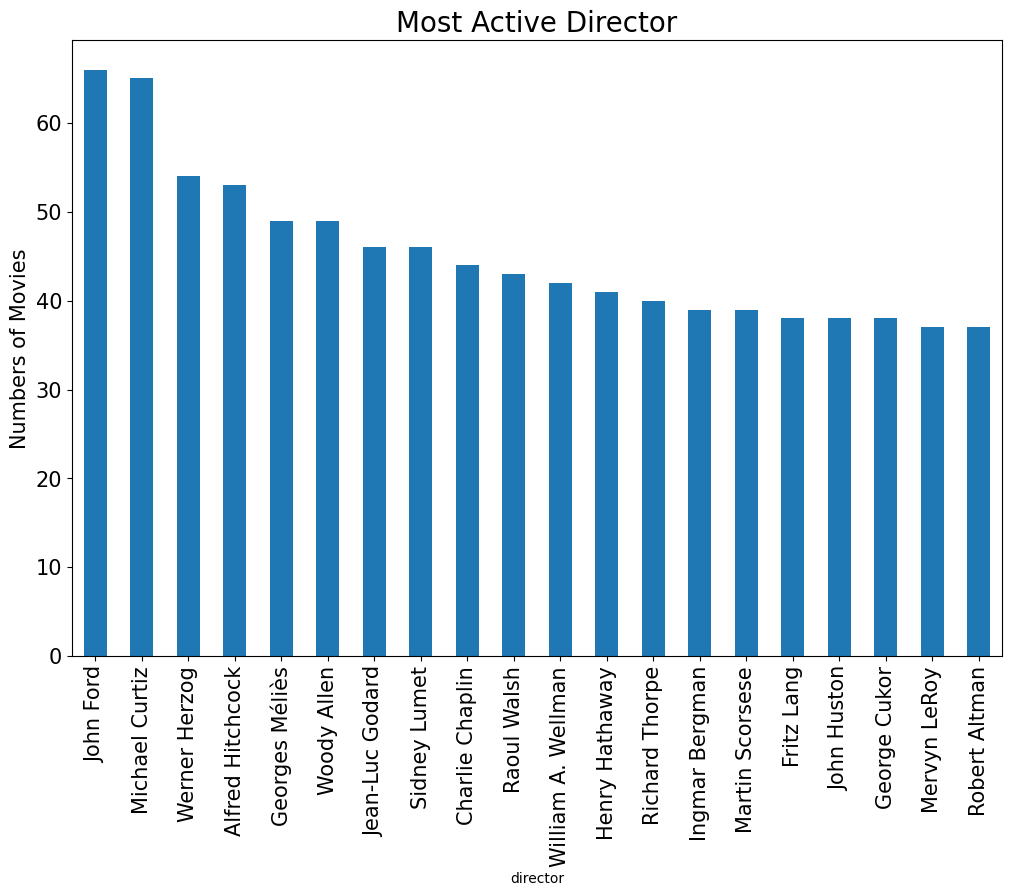

In [286]:
plt.figure(figsize = (12, 8))
df.director.value_counts().head(20).plot(kind='bar', fontsize=15)
plt.title("Most Active Director", fontsize=20)
plt.ylabel("Numbers of Movies", fontsize=15)
plt.show()

In [287]:
df.groupby("director").revenue_musd.sum().nlargest(20)

director
Steven Spielberg    9256.62
Peter Jackson       6528.24
Michael Bay         6437.47
James Cameron       5900.61
David Yates         5334.56
Christopher Nolan   4747.41
Robert Zemeckis     4138.23
Tim Burton          4032.92
Ridley Scott        3917.53
Chris Columbus      3866.84
Roland Emmerich     3798.40
Ron Howard          3714.15
J.J. Abrams         3579.22
Gore Verbinski      3575.34
George Lucas        3341.55
Sam Raimi           3193.79
Francis Lawrence    3183.34
Clint Eastwood      3100.68
Bill Condon         3017.30
Joss Whedon         2963.83
Name: revenue_musd, dtype: float64

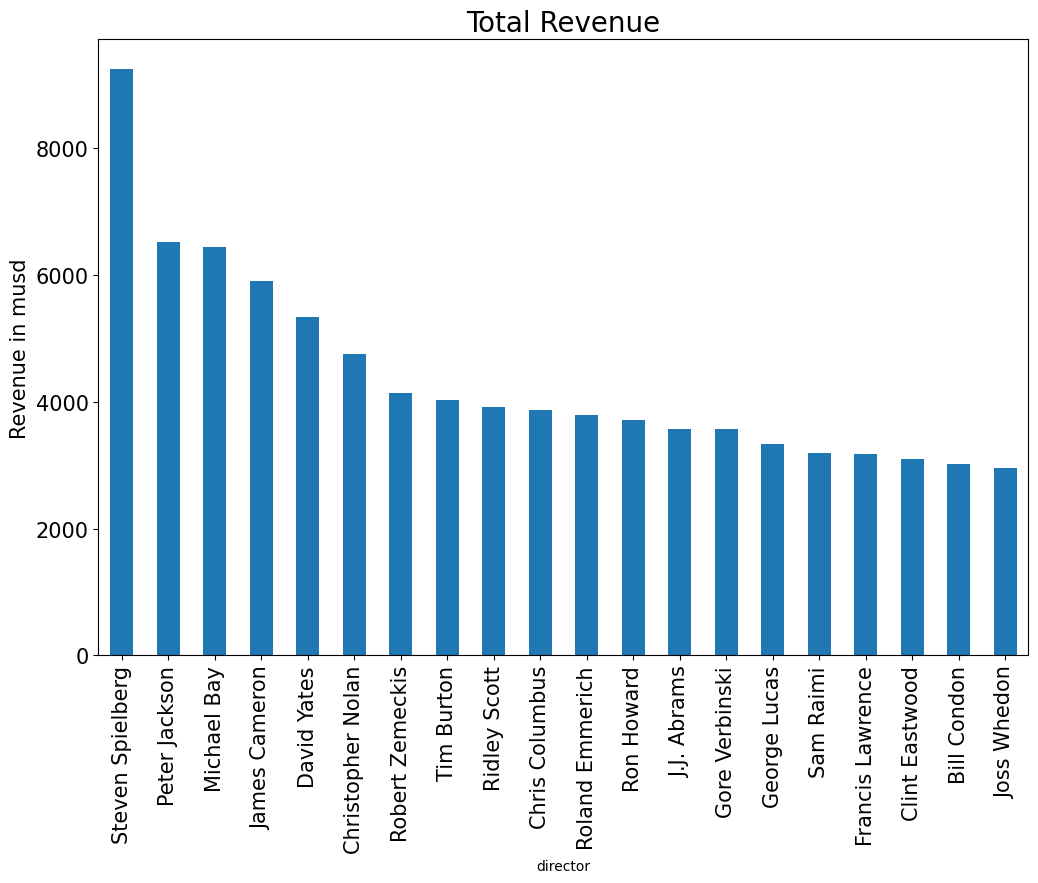

In [288]:
plt.figure(figsize = (12, 8))
df.groupby("director").revenue_musd.sum().nlargest(20).plot(kind='bar', fontsize=15)
plt.title("Total Revenue", fontsize=20)
plt.ylabel("Revenue in musd", fontsize=15)
plt.show()

In [289]:
directors = df.groupby("director").agg({
    "title":"count",
    "vote_average":"mean",
    "vote_count":"sum"
})

In [290]:
directors

,title,vote_average,vote_count
director,,,
Dale Trevillion\t,2,4.00,4.00
Davide Manuli,1,6.90,10.00
E.W. Swackhamer,1,5.90,5.00
Vitaliy Vorobyov,1,5.50,3.00
Yeon Sang-Ho,4,6.60,1039.00
...,...,...,...
Ярополк Лапшин,1,10.00,1.00
پیمان معادی,1,6.00,2.00
塩谷 直義,1,7.20,40.00


In [291]:
directors[(directors.vote_count >= 10000) & (directors.title >= 10)].nlargest(20, "vote_average")

,title,vote_average,vote_count
director,,,
Hayao Miyazaki,14,7.70,14700.00
Christopher Nolan,11,7.62,67344.00
Quentin Tarantino,10,7.49,45910.00
Wes Anderson,10,7.37,11743.00
David Fincher,10,7.35,37588.00
Martin Scorsese,39,7.22,35541.00
Peter Jackson,13,7.14,47571.00
Joel Coen,17,7.02,18139.00
James Cameron,11,6.93,33736.00


Most Successful Actors - Part 1

In [292]:
df.cast

0                                     Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wallace Shawn|John Ratzenberger|Annie Potts|John Morris|Erik von Detten|Laurie Metcalf|R. Lee Ermey|Sarah Freeman|Penn Jillette
1        Robin Williams|Jonathan Hyde|Kirsten Dunst|Bradley Pierce|Bonnie Hunt|Bebe Neuwirth|David Alan Grier|Patricia Clarkson|Adam Hann-Byrd|Laura Bell Bundy|James Handy|Gillian Barber|Brandon Obray|Cyru...
2                                                                                                                 Walter Matthau|Jack Lemmon|Ann-Margret|Sophia Loren|Daryl Hannah|Burgess Meredith|Kevin Pollak
3                                                          Whitney Houston|Angela Bassett|Loretta Devine|Lela Rochon|Gregory Hines|Dennis Haysbert|Michael Beach|Mykelti Williamson|Lamont Johnson|Wesley Snipes
4                               Steve Martin|Diane Keaton|Martin Short|Kimberly Williams-Paisley|George Newbern|Kieran Culkin|BD Wong|Peter Michael Goetz|Kate McGre

In [293]:
df.set_index("id", inplace=True)

In [294]:
df

,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
id,,,,,,,,,,,,,,,,,,,,,
862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.00,373.55,Pixar Animation Studios,United States of America,5415.00,7.70,21.95,81.00,"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circum...",English,<img src='http://image.tmdb.org/t/p/w185//uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg' style='height:100px;'>,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wallace Shawn|John Ratzenberger|Annie Potts|John Morris|Erik von Detten|Laurie Metcalf|R. Lee Ermey|Sarah Freeman|Penn Jillette,13,106,John Lasseter
8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,65.00,262.80,TriStar Pictures|Teitler Film|Interscope Communications,United States of America,2413.00,6.90,17.02,104.00,"When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- in...",English|Français,<img src='http://image.tmdb.org/t/p/w185//vgpXmVaVyUL7GGiDeiK1mKEKzcX.jpg' style='height:100px;'>,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bradley Pierce|Bonnie Hunt|Bebe Neuwirth|David Alan Grier|Patricia Clarkson|Adam Hann-Byrd|Laura Bell Bundy|James Handy|Gillian Barber|Brandon Obray|Cyru...,26,16,Joe Johnston
15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for Love.,1995-12-22,Romance|Comedy,Grumpy Old Men Collection,en,NaN,NaN,Warner Bros.|Lancaster Gate,United States of America,92.00,6.50,11.71,101.00,"A family wedding reignites the ancient feud between next-door neighbors and fishing buddies John and Max. Meanwhile, a sultry Italian divorcée opens a restaurant at the local bait shop, alarming t...",English,<img src='http://image.tmdb.org/t/p/w185//1FSXpj5e8l4KH6nVFO5SPUeraOt.jpg' style='height:100px;'>,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia Loren|Daryl Hannah|Burgess Meredith|Kevin Pollak,7,4,Howard Deutch
31357,Waiting to Exhale,Friends are the people who let you be yourself... and never let you forget it.,1995-12-22,Comedy|Drama|Romance,NaN,en,16.00,81.45,Twentieth Century Fox Film Corporation,United States of America,34.00,6.10,3.86,127.00,"Cheated on, mistreated and stepped on, the women are holding their breath, waiting for the elusive ""good man"" to break a string of less-than-stellar lovers. Friends and confidants Vannah, Bernie, ...",English,<img src='http://image.tmdb.org/t/p/w185//4wjGMwPsdlvi025ZqR4rXnFDvBz.jpg' style='height:100px;'>,Whitney Houston|Angela Bassett|Loretta Devine|Lela Rochon|Gregory Hines|Dennis Haysbert|Michael Beach|Mykelti Williamson|Lamont Johnson|Wesley Snipes,10,10,Forest Whitaker
11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's In For The Surprise Of His Life!,1995-02-10,Comedy,Father of the Bride Collection,en,NaN,76.58,Sandollar Productions|Touchstone Pictures,United States of America,173.00,5.70,8.39,106.00,"Just when George Banks has recovered from his daughter's wedding, he receives the news that she's pregnant ... and that George's wife, Nina, is expecting too. He was planning on selling their home...",English,<img src='http://image.tmdb.org/t/p/w185//lf9RTErt8BSLQy98aSFblElvsCQ.jpg' style='height:100px;'>,Steve Martin|Diane Keaton|Martin Short|Kimberly Williams-Paisley|George Newbern|Kieran Culkin|BD Wong|Peter Michael Goetz|Kate McGregor-Stewart|Jane Adams|Eugene Levy|Lori Alan,12,7,Charles Shyer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439050,Subdue,Rising and falling between a man and woman,NaT,Drama|Family,NaN,fa,Na

In [295]:
df.cast.str.split("|", expand=True)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,...,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
862,Tom Hanks,Tim Allen,Don Rickles,Jim Varney,Wallace Shawn,John Ratzenberger,Annie Potts,John Morris,Erik von Detten,Laurie Metcalf,R. Lee Ermey,Sarah Freeman,Penn Jillette,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
8844,Robin Williams,Jonathan Hyde,Kirsten Dunst,Bradley Pierce,Bonnie Hunt,Bebe Neuwirth,David Alan Grier,Patricia Clarkson,Adam Hann-Byrd,Laura Bell Bundy,James Handy,Gillian Barber,Brandon Obray,Cyrus Thiedeke,Gary Joseph Thorup,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
15602,Walter Matthau,Jack Lemmon,Ann-Margret,Sophia Loren,Daryl Hannah,Burgess Meredith,Kevin Pollak,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
31357,Whitney Houston,Angela Bassett,Loretta Devine,Lela Rochon,Gregory Hines,Dennis Haysbert,Michael Beach,Mykelti Williamson,Lamont Johnson,Wesley Snipes,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
11862,Steve Martin,Diane Keaton,Martin Short,Kimberly Williams-Paisley,George Newbern,Kieran Culkin,BD Wong,Peter Michael Goetz,Kate McGregor-Stewart,Jane Adams,Eugene Levy,Lori Alan,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439050,Leila Hatami,Kourosh Tahami,Elham Korda,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
111109,Angel Aquino,Perry Dizon,Hazel Orencio,Joel Torre,Bart Guingona,Soliman Cruz,Roeder,Angeli Bayani,Dante Perez,Betty Uy-Regala,Modesta,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
67758,Erika Eleniak,Adam Baldwin,Julie du Page,James Remar,Damian Chapa,Louis Mandylor,Tom Wright,Jeremy Lelliott,James Quattrochi,Jason Widener,Joe Sabatino,Kiko Ellsworth,Don Swayze,Peter Dobson,Darrell Dubovsky,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [296]:
act = df.cast.str.split("|", expand=True)
act

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,...,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
862,Tom Hanks,Tim Allen,Don Rickles,Jim Varney,Wallace Shawn,John Ratzenberger,Annie Potts,John Morris,Erik von Detten,Laurie Metcalf,R. Lee Ermey,Sarah Freeman,Penn Jillette,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
8844,Robin Williams,Jonathan Hyde,Kirsten Dunst,Bradley Pierce,Bonnie Hunt,Bebe Neuwirth,David Alan Grier,Patricia Clarkson,Adam Hann-Byrd,Laura Bell Bundy,James Handy,Gillian Barber,Brandon Obray,Cyrus Thiedeke,Gary Joseph Thorup,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
15602,Walter Matthau,Jack Lemmon,Ann-Margret,Sophia Loren,Daryl Hannah,Burgess Meredith,Kevin Pollak,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
31357,Whitney Houston,Angela Bassett,Loretta Devine,Lela Rochon,Gregory Hines,Dennis Haysbert,Michael Beach,Mykelti Williamson,Lamont Johnson,Wesley Snipes,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
11862,Steve Martin,Diane Keaton,Martin Short,Kimberly Williams-Paisley,George Newbern,Kieran Culkin,BD Wong,Peter Michael Goetz,Kate McGregor-Stewart,Jane Adams,Eugene Levy,Lori Alan,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439050,Leila Hatami,Kourosh Tahami,Elham Korda,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
111109,Angel Aquino,Perry Dizon,Hazel Orencio,Joel Torre,Bart Guingona,Soliman Cruz,Roeder,Angeli Bayani,Dante Perez,Betty Uy-Regala,Modesta,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
67758,Erika Eleniak,Adam Baldwin,Julie du Page,James Remar,Damian Chapa,Louis Mandylor,Tom Wright,Jeremy Lelliott,James Quattrochi,Jason Widener,Joe Sabatino,Kiko Ellsworth,Don Swayze,Peter Dobson,Darrell Dubovsky,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [297]:
act.stack()

id       
862     0            Tom Hanks
        1            Tim Allen
        2          Don Rickles
        3           Jim Varney
        4        Wallace Shawn
                   ...        
227506  0     Iwan Mosschuchin
        1    Nathalie Lissenko
        2         Pavel Pavlov
        3    Aleksandr Chabrov
        4          Vera Orlova
Length: 557703, dtype: object

In [298]:
act.stack().reset_index()

,id,level_1,0
0,862,0,Tom Hanks
1,862,1,Tim Allen
2,862,2,Don Rickles
3,862,3,Jim Varney
4,862,4,Wallace Shawn
...,...,...,...
557698,227506,0,Iwan Mosschuchin
557699,227506,1,Nathalie Lissenko
557700,227506,2,Pavel Pavlov
557701,227506,3,Aleksandr Chabrov


In [299]:
act.stack().reset_index(level=1, drop=True).to_frame()

,0
id,
862,Tom Hanks
862,Tim Allen
862,Don Rickles
862,Jim Varney
862,Wallace Shawn
...,...
227506,Iwan Mosschuchin
227506,Nathalie Lissenko
227506,Pavel Pavlov


In [300]:
act

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,...,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
862,Tom Hanks,Tim Allen,Don Rickles,Jim Varney,Wallace Shawn,John Ratzenberger,Annie Potts,John Morris,Erik von Detten,Laurie Metcalf,R. Lee Ermey,Sarah Freeman,Penn Jillette,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
8844,Robin Williams,Jonathan Hyde,Kirsten Dunst,Bradley Pierce,Bonnie Hunt,Bebe Neuwirth,David Alan Grier,Patricia Clarkson,Adam Hann-Byrd,Laura Bell Bundy,James Handy,Gillian Barber,Brandon Obray,Cyrus Thiedeke,Gary Joseph Thorup,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
15602,Walter Matthau,Jack Lemmon,Ann-Margret,Sophia Loren,Daryl Hannah,Burgess Meredith,Kevin Pollak,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
31357,Whitney Houston,Angela Bassett,Loretta Devine,Lela Rochon,Gregory Hines,Dennis Haysbert,Michael Beach,Mykelti Williamson,Lamont Johnson,Wesley Snipes,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
11862,Steve Martin,Diane Keaton,Martin Short,Kimberly Williams-Paisley,George Newbern,Kieran Culkin,BD Wong,Peter Michael Goetz,Kate McGregor-Stewart,Jane Adams,Eugene Levy,Lori Alan,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439050,Leila Hatami,Kourosh Tahami,Elham Korda,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
111109,Angel Aquino,Perry Dizon,Hazel Orencio,Joel Torre,Bart Guingona,Soliman Cruz,Roeder,Angeli Bayani,Dante Perez,Betty Uy-Regala,Modesta,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
67758,Erika Eleniak,Adam Baldwin,Julie du Page,James Remar,Damian Chapa,Louis Mandylor,Tom Wright,Jeremy Lelliott,James Quattrochi,Jason Widener,Joe Sabatino,Kiko Ellsworth,Don Swayze,Peter Dobson,Darrell Dubovsky,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [301]:
act = act.stack().reset_index(level=1, drop=True).to_frame()

In [302]:
act

,0
id,
862,Tom Hanks
862,Tim Allen
862,Don Rickles
862,Jim Varney
862,Wallace Shawn
...,...
227506,Iwan Mosschuchin
227506,Nathalie Lissenko
227506,Pavel Pavlov


In [303]:
act.columns = ["Actor"]

In [304]:
act

,Actor
id,
862,Tom Hanks
862,Tim Allen
862,Don Rickles
862,Jim Varney
862,Wallace Shawn
...,...
227506,Iwan Mosschuchin
227506,Nathalie Lissenko
227506,Pavel Pavlov


In [305]:
act = act.merge(df[["title", "revenue_musd", "vote_average", "popularity"]],
                how="left", left_index=True, right_index=True)

In [306]:
act

,Actor,title,revenue_musd,vote_average,popularity
id,,,,,
2,Turo Pajala,Ariel,NaN,7.10,3.86
2,Susanna Haavisto,Ariel,NaN,7.10,3.86
2,Matti Pellonpää,Ariel,NaN,7.10,3.86
2,Eetu Hilkamo,Ariel,NaN,7.10,3.86
3,Matti Pellonpää,Shadows in Paradise,NaN,7.10,2.29
...,...,...,...,...,...
469172,Vasco Sequeira,Manuel on the Island of Wonders,NaN,NaN,0.00
469172,Armanda Bacelar,Manuel on the Island of Wonders,NaN,NaN,0.00
469172,Rafael de Sousa,Manuel on the Island of Wonders,NaN,NaN,0.00


Most Successful Actors - Part 2

In [307]:
act.Actor.nunique()

201501

In [308]:
act.Actor.value_counts().head(20)

Actor
Bess Flowers          240
Christopher Lee       148
John Wayne            125
Samuel L. Jackson     122
Michael Caine         110
Gérard Depardieu      109
John Carradine        109
Jackie Chan           108
Donald Sutherland     108
Frank Welker          107
Robert De Niro        104
Danny Trejo           101
Steve Buscemi         101
Irving Bacon           98
John Goodman           97
Christopher Walken     96
Danny Glover           95
John Hurt              93
Susan Sarandon         92
Dennis Hopper          92
Name: count, dtype: int64

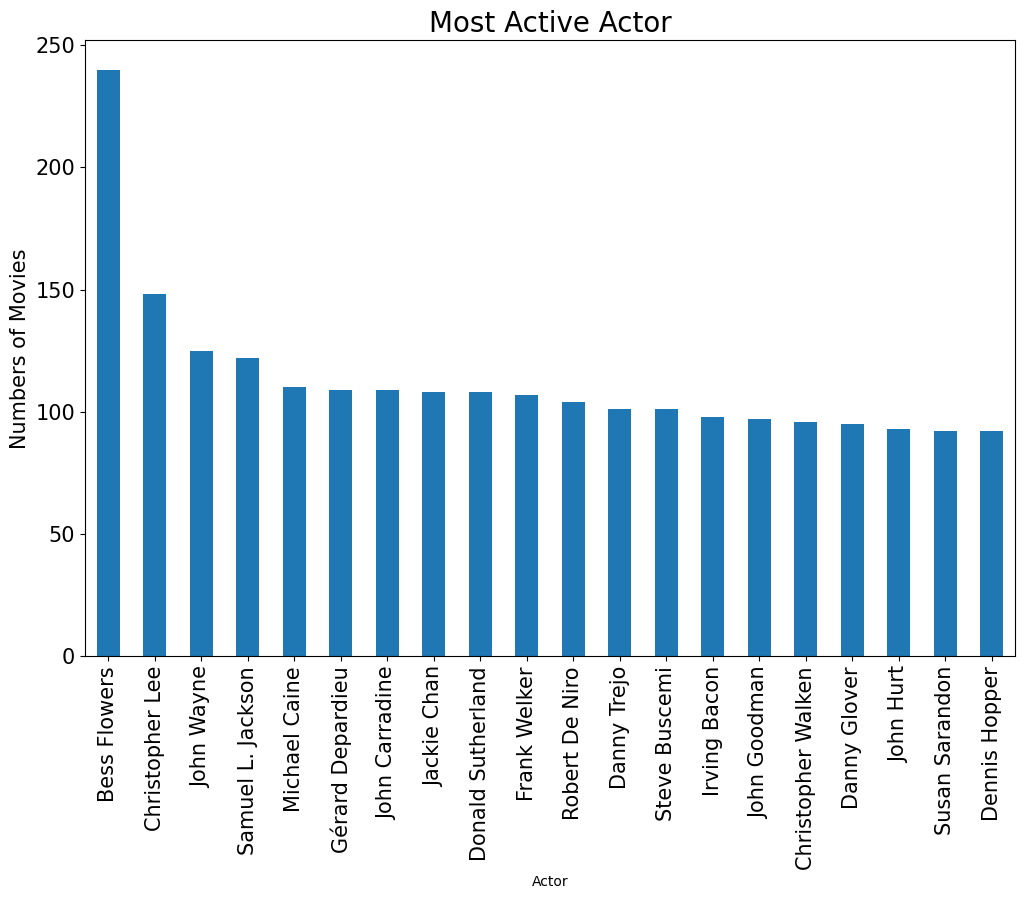

In [309]:
plt.figure(figsize=(12, 8))
act.Actor.value_counts().head(20).plot(kind='bar', fontsize=15)
plt.title("Most Active Actor", fontsize=20)
plt.ylabel("Numbers of Movies", fontsize=15)
plt.show()

In [310]:
agg = act.groupby("Actor").agg(
    Total_Revenue = ("revenue_musd", "sum"),
    Total_Movies = ("Actor", "count"),
    Mean_Rating = ("vote_average", "mean"),
    Mean_Pop = ("popularity", "mean")
)

In [311]:
agg

,Total_Revenue,Total_Movies,Mean_Rating,Mean_Pop
Actor,,,,
\tCheung Chi-Sing,0.00,1,5.90,3.05
\tDouglas Hegdahl,0.00,1,4.00,0.15
\tRobert Osth,0.00,1,6.00,1.81
\tYip Chun,0.00,2,6.75,1.80
Jorge de los Reyes,0.00,1,8.10,3.47
...,...,...,...,...
长泽雅美,0.35,11,6.40,2.82
陳美貞,83.06,1,7.00,6.49
高桥一生,333.11,8,6.74,9.10


In [329]:
agg.nlargest(10, "Total_Revenue")

,Total_Revenue,Total_Movies,Mean_Rating,Mean_Pop
Actor,,,,
Stan Lee,19414.96,48,6.51,29.94
Samuel L. Jackson,17109.62,122,6.27,11.70
Warwick Davis,13256.03,34,6.29,13.09
Frank Welker,13044.15,107,6.31,9.57
John Ratzenberger,12596.13,46,6.48,10.96
Jess Harnell,12234.61,35,6.44,10.92
Hugo Weaving,11027.58,40,6.47,10.97
Ian McKellen,11015.59,44,6.35,15.45
Johnny Depp,10653.76,69,6.44,12.38


In [330]:
agg.nlargest(10, "Total_Movies")

,Total_Revenue,Total_Movies,Mean_Rating,Mean_Pop
Actor,,,,
Bess Flowers,368.91,240,6.18,2.03
Christopher Lee,9417.05,148,5.91,4.75
John Wayne,236.09,125,5.71,3.09
Samuel L. Jackson,17109.62,122,6.27,11.70
Michael Caine,8053.40,110,6.27,8.27
Gérard Depardieu,1247.61,109,6.05,3.70
John Carradine,255.84,109,5.55,2.43
Donald Sutherland,5390.77,108,6.23,7.00
Jackie Chan,4699.19,108,6.28,5.86


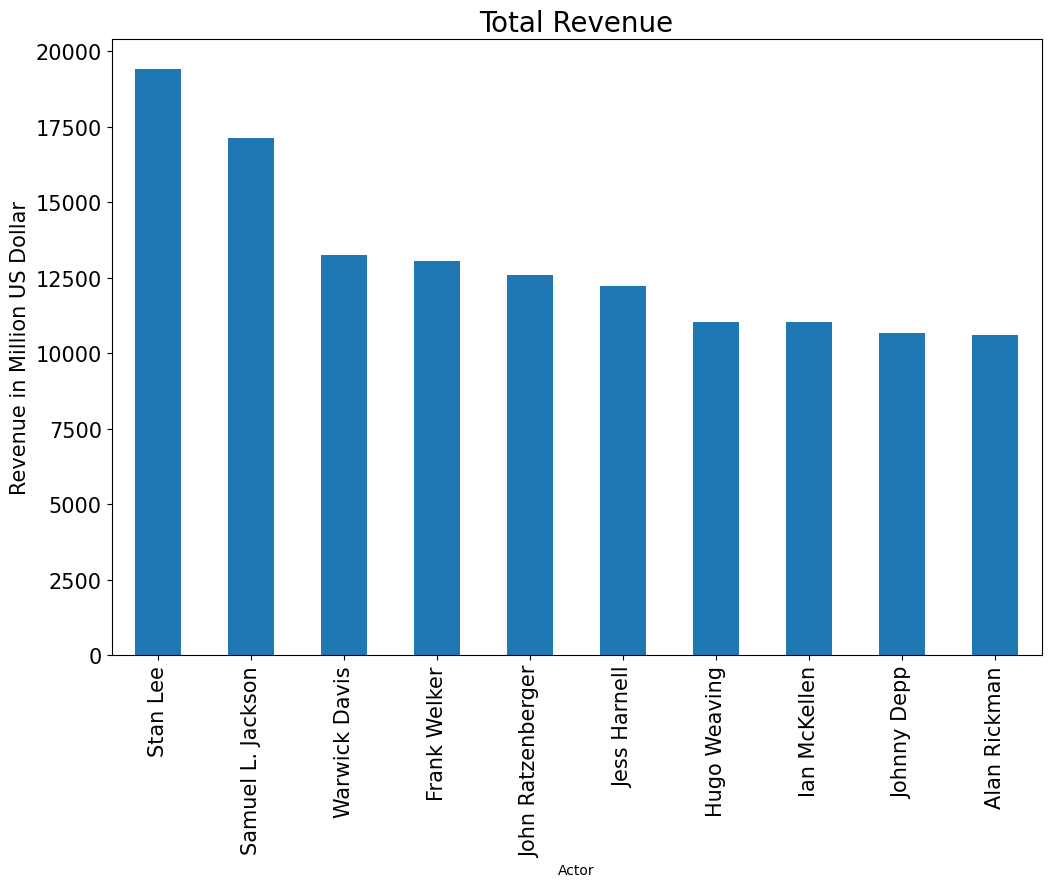

In [331]:
plt.figure(figsize=(12, 8))
agg.Total_Revenue.nlargest(10).plot(kind='bar', fontsize=15)
plt.title("Total Revenue", fontsize=20)
plt.ylabel("Revenue in Million US Dollar", fontsize=15)
plt.show()